In [1]:
#!pip install xlrd
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [3]:
import pandas as pd
df1  = pd.read_excel("../data/EARLY.xls")
df2  = pd.read_excel("../data/DIABETIC.xls")
df2 = df2[df2['DIABETIC']==1]
df3  = pd.read_csv("../data/dfs_1999_2018.csv")
df3.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


C:\Users\foun3301\AppData\Local\Temp\ipykernel_15488\519463267.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df3  = pd.read_csv("../data/dfs_1999_2018.csv")


,Unnamed: 0,SEQN,BMXBMI,DUQ100,PADLEVEL,PAD120,PAQ180,PAD200,PAD320,PAD440,PAQ480,PAQ520,DIQ010
0,1,9966,30.22,1.0,1.0,4.0,3.0,1.0,1.0,1.0,NaN,1.0,2.0
1,2,9966,30.22,1.0,1.0,4.0,3.0,1.0,1.0,1.0,NaN,1.0,2.0
2,3,9966,30.22,1.0,1.0,4.0,3.0,1.0,1.0,1.0,NaN,1.0,2.0
3,4,9966,30.22,1.0,1.0,4.0,3.0,1.0,1.0,1.0,NaN,1.0,2.0
4,5,9966,30.22,1.0,2.0,4.0,3.0,1.0,1.0,1.0,NaN,1.0,2.0


In [6]:
!cd

C:\Users\foun3301\Documents\Postdoc\Projet1\scripts


In [5]:
print('len df1:',len(df1),'len df2:',len(df2),'len df3:',len(df3))

len df1: 8317 len df2: 333 len df3: 147552


In [48]:
df2.head()

,SEQN,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,COMB,EXPCAN,TOTAL_ACCULTURATION_SCORE_v2,POVERTIES,HTN,DIABETIC
108,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,NaN,NaN,2.0,0.0,0.0,1.0
132,10264,1,42,1,2.0,0,1.0,1.0,3,1.0,NaN,NaN,2.0,0.0,NaN,1.0
285,10635,1,45,2,1.0,1,1.0,1.0,1,0.0,NaN,NaN,3.0,0.0,0.0,1.0
292,10659,1,40,2,2.0,1,1.0,0.0,2,1.0,NaN,NaN,2.0,0.0,1.0,1.0
306,10705,1,46,1,3.0,1,2.0,1.0,2,1.0,NaN,NaN,2.0,0.0,1.0,1.0


In [49]:
df31 = pd.merge(df2, df3, on="SEQN")
df31.head()

,SEQN,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,...,DUQ100,PADLEVEL,PAD120,PAQ180,PAD200,PAD320,PAD440,PAQ480,PAQ520,DIQ010
0,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,2.0,1.0,6.0,2.0,2.0,1.0,2.0,NaN,3.0,3.0
1,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10264,1,42,1,2.0,0,1.0,1.0,3,1.0,...,2.0,1.0,NaN,2.0,2.0,1.0,2.0,NaN,3.0,2.0
3,10635,1,45,2,1.0,1,1.0,1.0,1,0.0,...,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,3.0,1.0
4,10635,1,45,2,1.0,1,1.0,1.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
len(df31)

702

In [51]:
df31.tail()

,SEQN,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,...,DUQ100,PADLEVEL,PAD120,PAQ180,PAD200,PAD320,PAD440,PAQ480,PAQ520,DIQ010
697,56696,1,46,3,1.0,0,1.0,NaN,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
698,56698,1,29,3,3.0,0,1.0,NaN,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,56698,1,29,3,3.0,0,1.0,NaN,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
700,56703,2,40,2,1.0,0,2.0,NaN,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,56703,2,40,2,1.0,0,2.0,NaN,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [52]:
df31.isnull().sum()

SEQN                              0
RIAGENDR                          0
RIDAGEYR                          0
RACE                              0
COUPLE                            0
SMOKER                            0
EDUC                              0
COVERED_INSURANCE               124
FAT                               0
Abdobesity                       23
COMB                            589
EXPCAN                          563
TOTAL_ACCULTURATION_SCORE_v2      1
POVERTIES                        51
HTN                              51
DIABETIC                          0
Unnamed: 0                        0
BMXBMI                          168
DUQ100                          370
PADLEVEL                        392
PAD120                          369
PAQ180                          291
PAD200                          291
PAD320                          291
PAD440                          291
PAQ480                          702
PAQ520                          291
DIQ010                      

In [53]:
df31 = df31.drop(columns='Unnamed: 0',axis=1)
df31.head()

,SEQN,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,...,DUQ100,PADLEVEL,PAD120,PAQ180,PAD200,PAD320,PAD440,PAQ480,PAQ520,DIQ010
0,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,2.0,1.0,6.0,2.0,2.0,1.0,2.0,NaN,3.0,3.0
1,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10264,1,42,1,2.0,0,1.0,1.0,3,1.0,...,2.0,1.0,NaN,2.0,2.0,1.0,2.0,NaN,3.0,2.0
3,10635,1,45,2,1.0,1,1.0,1.0,1,0.0,...,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,3.0,1.0
4,10635,1,45,2,1.0,1,1.0,1.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df31 = df31.rename(columns={'DUQ100': "Cannabis",'PAD120':'Active_30','PAQ180':'PA_level_day','PAD200':'Vigorous_30','PAD320':'Moderate_30','PAD440':'strenghening','PAQ480':'TV_per_day'})

In [55]:
df31 = df31.drop(columns=['COMB','EXPCAN'],axis=1)
df31.head()

,SEQN,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,...,Cannabis,PADLEVEL,Active_30,PA_level_day,Vigorous_30,Moderate_30,strenghening,TV_per_day,PAQ520,DIQ010
0,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,2.0,1.0,6.0,2.0,2.0,1.0,2.0,NaN,3.0,3.0
1,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10264,1,42,1,2.0,0,1.0,1.0,3,1.0,...,2.0,1.0,NaN,2.0,2.0,1.0,2.0,NaN,3.0,2.0
3,10635,1,45,2,1.0,1,1.0,1.0,1,0.0,...,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,3.0,1.0
4,10635,1,45,2,1.0,1,1.0,1.0,1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#df32 = df31.dropna()
len(df31)

702

In [57]:
df32 = df31.loc[df31["Cannabis"] <= 2.0]
df32.head()

,SEQN,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,...,Cannabis,PADLEVEL,Active_30,PA_level_day,Vigorous_30,Moderate_30,strenghening,TV_per_day,PAQ520,DIQ010
0,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,2.0,1.0,6.0,2.0,2.0,1.0,2.0,NaN,3.0,3.0
2,10264,1,42,1,2.0,0,1.0,1.0,3,1.0,...,2.0,1.0,NaN,2.0,2.0,1.0,2.0,NaN,3.0,2.0
5,10659,1,40,2,2.0,1,1.0,0.0,2,1.0,...,2.0,NaN,NaN,1.0,2.0,2.0,1.0,NaN,2.0,1.0
7,10705,1,46,1,3.0,1,2.0,1.0,2,1.0,...,1.0,NaN,NaN,1.0,2.0,2.0,2.0,NaN,2.0,2.0
8,11140,1,30,3,3.0,1,1.0,0.0,1,NaN,...,1.0,NaN,NaN,1.0,2.0,2.0,2.0,NaN,2.0,2.0


In [58]:
df32["Cannabis"].unique()

array([2., 1.])

In [59]:
df32.isnull().sum()

SEQN                              0
RIAGENDR                          0
RIDAGEYR                          0
RACE                              0
COUPLE                            0
SMOKER                            0
EDUC                              0
COVERED_INSURANCE                 5
FAT                               0
Abdobesity                        8
TOTAL_ACCULTURATION_SCORE_v2      0
POVERTIES                        20
HTN                              12
DIABETIC                          0
BMXBMI                            7
Cannabis                          0
PADLEVEL                         39
Active_30                        35
PA_level_day                      0
Vigorous_30                       0
Moderate_30                       0
strenghening                      0
TV_per_day                      332
PAQ520                            0
DIQ010                            0
dtype: int64

In [60]:
df33 = df32.drop(columns = 'TV_per_day',axis=1)
df33.head()

,SEQN,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,...,BMXBMI,Cannabis,PADLEVEL,Active_30,PA_level_day,Vigorous_30,Moderate_30,strenghening,PAQ520,DIQ010
0,10234,2,41,3,3.0,0,3.0,1.0,3,1.0,...,38.11,2.0,1.0,6.0,2.0,2.0,1.0,2.0,3.0,3.0
2,10264,1,42,1,2.0,0,1.0,1.0,3,1.0,...,33.30,2.0,1.0,NaN,2.0,2.0,1.0,2.0,3.0,2.0
5,10659,1,40,2,2.0,1,1.0,0.0,2,1.0,...,29.76,2.0,NaN,NaN,1.0,2.0,2.0,1.0,2.0,1.0
7,10705,1,46,1,3.0,1,2.0,1.0,2,1.0,...,26.97,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0
8,11140,1,30,3,3.0,1,1.0,0.0,1,NaN,...,NaN,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0


In [61]:
df33['Active_30'].unique()

array([ 6., nan,  4.,  1.,  9.,  3.,  2., 17., 20., 30., 13., 60., 26.])

In [62]:
df33['PADLEVEL'].unique()

array([ 1., nan,  2.])

In [63]:
df33['DIABETIC'].unique()

array([1.])

In [64]:
df33['HTN'].unique()

array([ 0., nan,  1.])

In [65]:
df33['POVERTIES'].unique()

array([ 0.,  1., nan])

In [66]:
df33['COVERED_INSURANCE'].unique()

array([ 1.,  0., nan])

In [67]:
df34 = df33.dropna()
len(df34)

257

In [68]:
df34.isnull().sum()

SEQN                            0
RIAGENDR                        0
RIDAGEYR                        0
RACE                            0
COUPLE                          0
SMOKER                          0
EDUC                            0
COVERED_INSURANCE               0
FAT                             0
Abdobesity                      0
TOTAL_ACCULTURATION_SCORE_v2    0
POVERTIES                       0
HTN                             0
DIABETIC                        0
BMXBMI                          0
Cannabis                        0
PADLEVEL                        0
Active_30                       0
PA_level_day                    0
Vigorous_30                     0
Moderate_30                     0
strenghening                    0
PAQ520                          0
DIQ010                          0
dtype: int64

- PADLEVEL: moderate(1), vogorous(2)
- Active_30: dropped, because confusing
- PA_level_day: 1-4

In [69]:
df36 = df34.drop('Active_30',axis=1) 

In [70]:
df36 = df36.drop('DIQ010',axis=1)

In [71]:
len(df36)

257

In [72]:
df37 = df36.drop_duplicates()
len(df37)

40

In [73]:
df36.describe()

,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,TOTAL_ACCULTURATION_SCORE_v2,...,HTN,DIABETIC,BMXBMI,Cannabis,PADLEVEL,PA_level_day,Vigorous_30,Moderate_30,strenghening,PAQ520
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.0,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,1.389105,37.256809,1.579767,2.474708,0.280156,2.774319,0.902724,2.603113,0.817121,1.233463,...,0.447471,1.0,31.387977,1.910506,1.525292,2.334630,1.097276,1.023346,1.552529,1.929961
std,0.488499,9.578428,0.787140,0.637640,0.449951,0.487782,0.296912,0.671744,0.387322,0.492095,...,0.498203,0.0,4.822744,0.286013,0.500334,0.665036,0.296912,0.151295,0.498203,0.876649
min,1.000000,22.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.0,20.240000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,28.000000,1.000000,2.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.0,29.810000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,40.000000,1.000000,3.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000,...,0.000000,1.0,31.910000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,2.000000,47.000000,2.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,1.0,34.380000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.000000
max,2.000000,49.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,...,1.000000,1.0,46.840000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000


# EDA

In [74]:
df37 = df36.drop(columns=['SEQN'],axis=1)

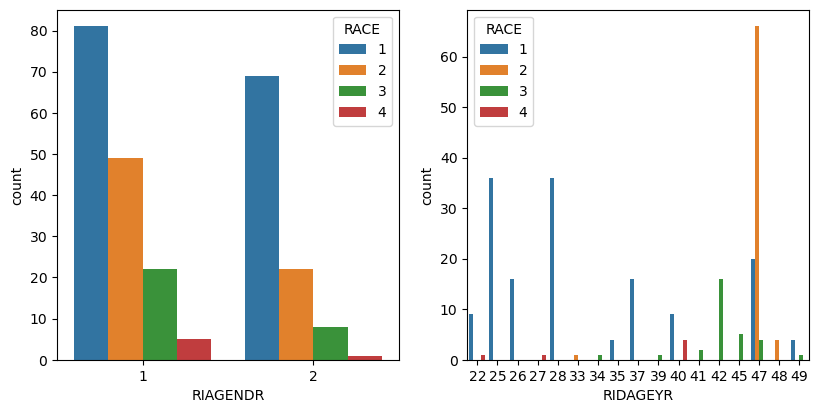

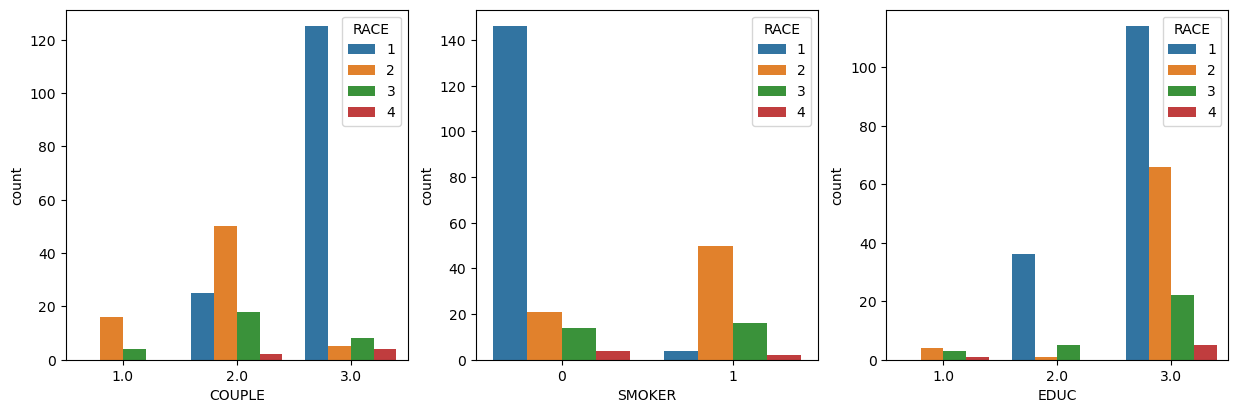

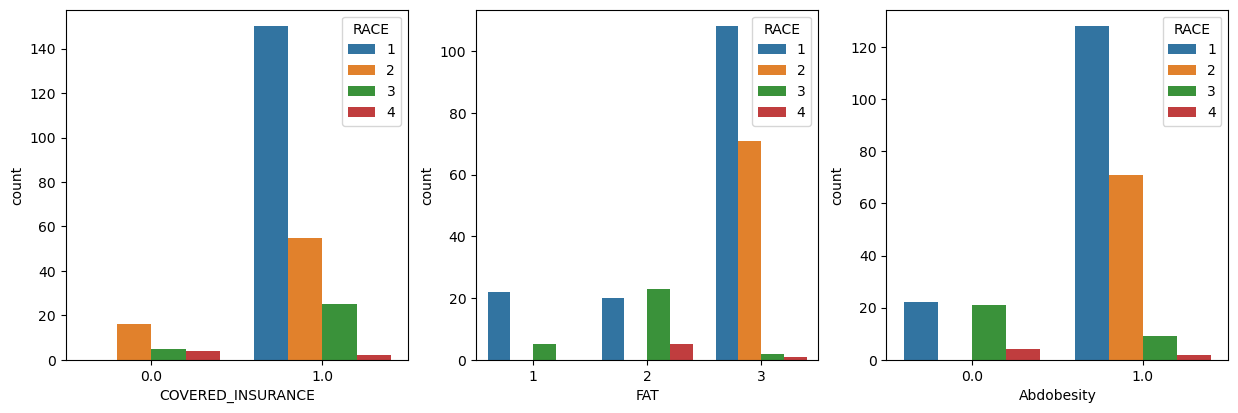

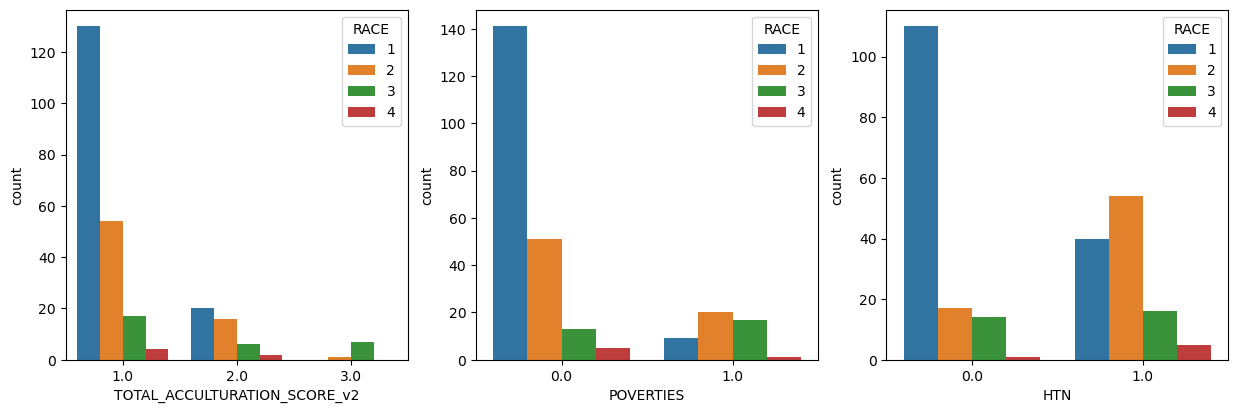

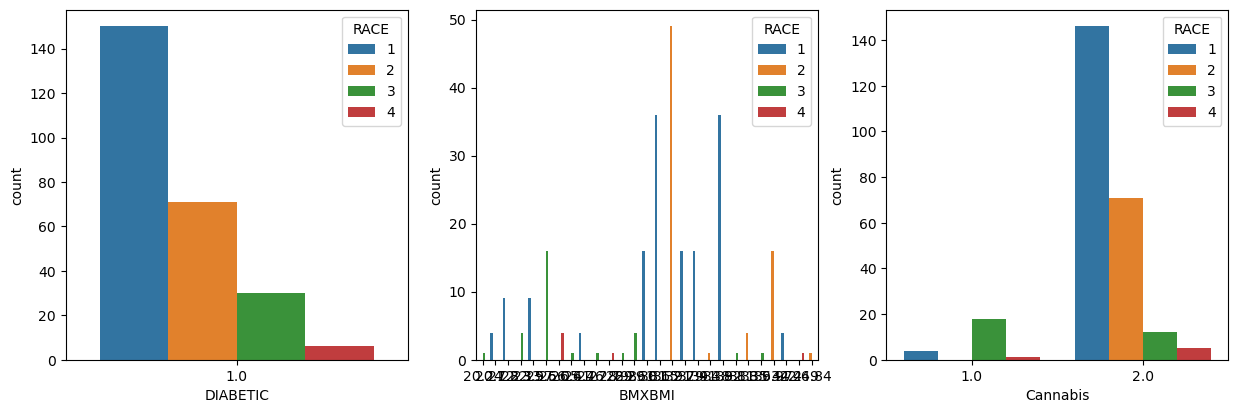

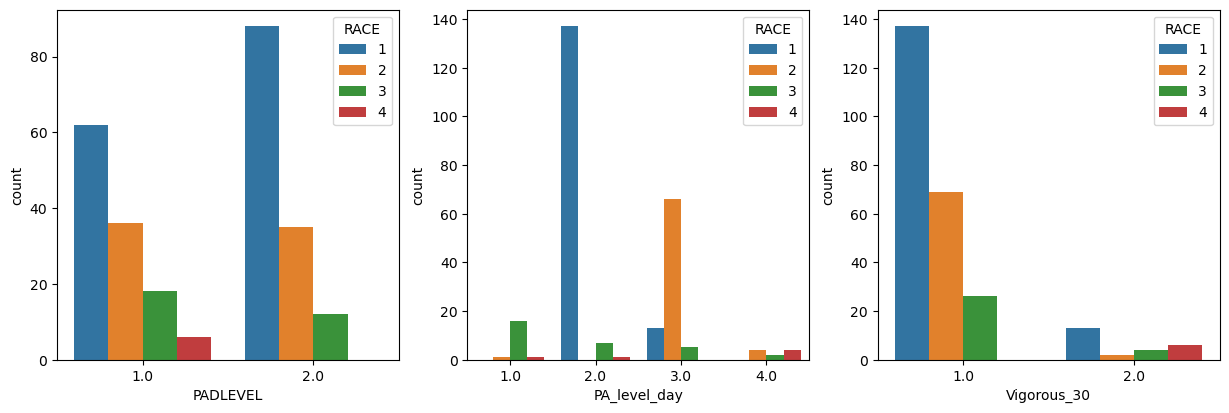

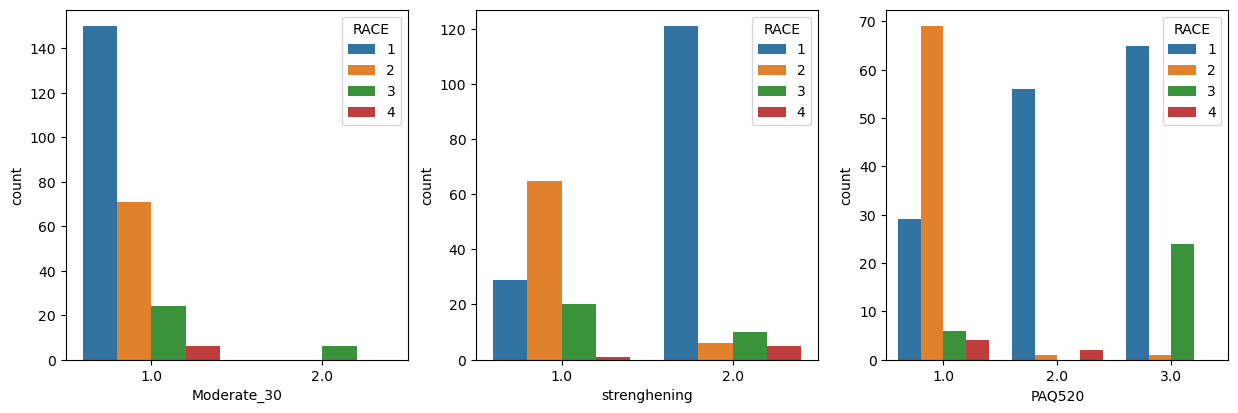

<Figure size 1500x1000 with 0 Axes>

In [75]:
import seaborn as sns
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df37.columns):
    if ix <= 3:
        if c != 'RACE':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df37, x=c, hue="RACE", ax = ax1)            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

### Normalize numerical values

In [76]:
# Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df37))
df_minmax.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.703704,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.5,...,0.0,0.0,0.671805,1.0,0.0,0.333333,1.0,0.0,1.0,1.0
1,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,0.0,0.333333,0.0,0.0,1.0,0.0
2,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,0.0,0.333333,0.0,0.0,1.0,0.0
3,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,1.0,0.333333,0.0,0.0,1.0,0.0
4,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,1.0,0.333333,0.0,0.0,1.0,0.0


In [77]:
df_minmax.columns = df37.columns
df_minmax.head()

,RIAGENDR,RIDAGEYR,RACE,COUPLE,SMOKER,EDUC,COVERED_INSURANCE,FAT,Abdobesity,TOTAL_ACCULTURATION_SCORE_v2,...,HTN,DIABETIC,BMXBMI,Cannabis,PADLEVEL,PA_level_day,Vigorous_30,Moderate_30,strenghening,PAQ520
0,1.0,0.703704,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.5,...,0.0,0.0,0.671805,1.0,0.0,0.333333,1.0,0.0,1.0,1.0
1,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,0.0,0.333333,0.0,0.0,1.0,0.0
2,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,0.0,0.333333,0.0,0.0,1.0,0.0
3,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,1.0,0.333333,0.0,0.0,1.0,0.0
4,1.0,0.148148,0.000000,0.5,0.0,1.0,1.0,0.5,1.0,0.5,...,0.0,0.0,0.359774,1.0,1.0,0.333333,0.0,0.0,1.0,0.0


## Features importance

- Chi2
- Gini coefficient
- Mutual information.

In [78]:
len(df_minmax)

257

The ranking is provided below:
Features
SMOKER                          86.904293
Vigorous_30                     54.323955
strenghening                    49.145938
PAQ520                          46.223830
Moderate_30                     45.400000
POVERTIES                       40.346113
RIDAGEYR                        29.731292
HTN                             29.002886
COUPLE                          17.344616
TOTAL_ACCULTURATION_SCORE_v2    15.467684
Abdobesity                      14.683270
PA_level_day                    14.287300
Cannabis                         9.901054
FAT                              8.511828
PADLEVEL                         5.265246
COVERED_INSURANCE                5.177362
RIAGENDR                         5.002237
BMXBMI                           4.620151
EDUC                             0.392080
dtype: float64
The graphical representation of the ranking is provided below:


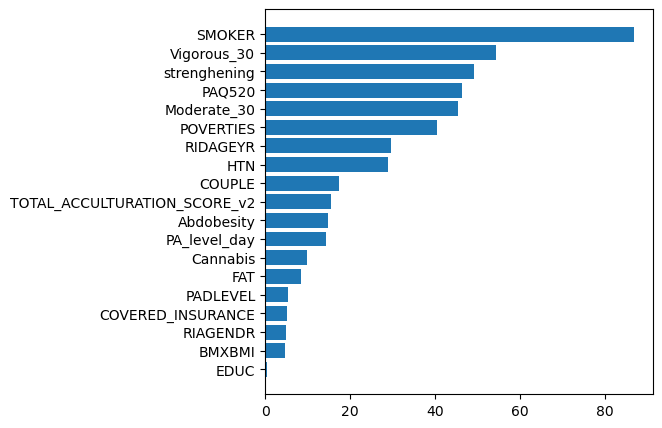

In [79]:
### Apply SelectKBest Algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

d = pd.DataFrame()
for i in range(100):
    X=df_minmax.drop(['RACE','DIABETIC'],axis=1)
    y=df37['RACE']

    ordered_rank_features=SelectKBest(score_func=chi2,k=15)
    ordered_feature=ordered_rank_features.fit(X,y)

    dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
    dfcolumns=pd.DataFrame(X.columns)

    features_rank=pd.concat([dfcolumns,dfscores],axis=1)

    features_rank.columns=['Features','Score']
    
    q = features_rank.rename(columns={'Score': 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]
d = pd.concat([dfcolumns,d],axis=1)
d = d.rename(columns={0: 'Features'})
d = d.set_index('Features')
print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

## Plot

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

d1 = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = d1.sort_values(by=0, ascending=True)
plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y)#,height = 0.9)
plt.show()

The ranking is provided below:
PA_level_day                    0.112641
SMOKER                          0.112638
RIDAGEYR                        0.099337
COUPLE                          0.097578
PAQ520                          0.091700
strenghening                    0.080713
FAT                             0.054495
BMXBMI                          0.046812
POVERTIES                       0.041975
COVERED_INSURANCE               0.039582
Abdobesity                      0.037291
HTN                             0.035559
TOTAL_ACCULTURATION_SCORE_v2    0.034060
Cannabis                        0.032813
Vigorous_30                     0.026380
EDUC                            0.023936
RIAGENDR                        0.018134
Moderate_30                     0.012488
PADLEVEL                        0.001870
dtype: float64
The graphical representation of the ranking is provided below:


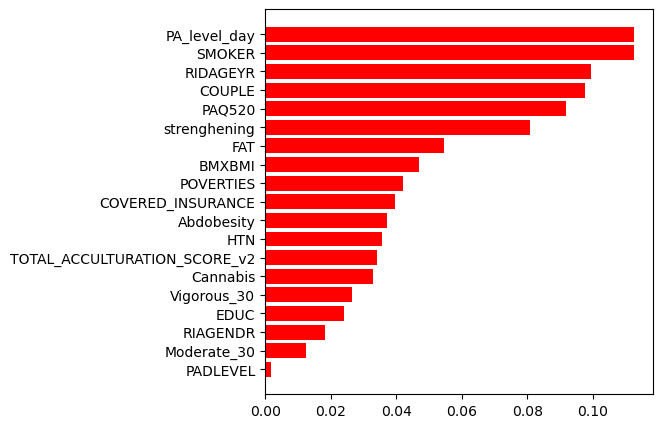

In [80]:
# ExtrExtraTreesClassifier
d = pd.DataFrame()
for i in range(100):
    #print('Simulation_'+str(i))
    from sklearn.ensemble import ExtraTreesClassifier
    import matplotlib.pyplot as plt

    X=df_minmax.drop(['RACE','DIABETIC'],axis=1)
    y=df37['RACE']
    model=ExtraTreesClassifier()
    model.fit(X,y)

    features=pd.Series(model.feature_importances_,index=X.columns)
    #print(features.sort_values(ascending=False))
    
    q = pd.DataFrame(features).rename(columns={0: 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]
print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

# plot

# Plot or graphical representation

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

gini = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = gini.sort_values(by=0, ascending=True)

plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y,color=['red'])#,height = 0.9)

plt.show()

The ranking is provided below:
BMXBMI                          0.930709
RIDAGEYR                        0.654190
PA_level_day                    0.591495
PAQ520                          0.343397
COUPLE                          0.328002
strenghening                    0.305657
FAT                             0.304041
SMOKER                          0.250960
Cannabis                        0.213306
HTN                             0.173134
Abdobesity                      0.140688
EDUC                            0.128071
Vigorous_30                     0.114769
COVERED_INSURANCE               0.106510
POVERTIES                       0.080553
TOTAL_ACCULTURATION_SCORE_v2    0.060265
Moderate_30                     0.055533
PADLEVEL                        0.029523
RIAGENDR                        0.024007
dtype: float64
The graphical representation of the ranking is provided below:


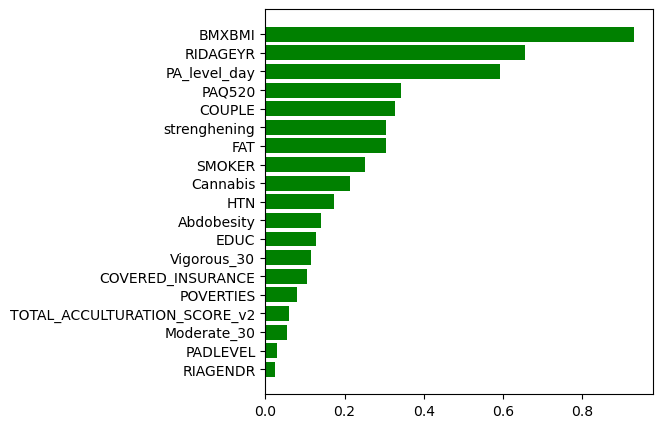

In [81]:
# Information Gain

d = pd.DataFrame()
for i in range(100):
    from sklearn.feature_selection import mutual_info_classif

    X=df_minmax.drop(['RACE','DIABETIC'],axis=1)
    y=df37['RACE']
    
    mutual_info=mutual_info_classif(X,y)

    mutual_data=pd.Series(mutual_info,index=X.columns)
    q = pd.DataFrame(mutual_data).rename(columns={0: 'Simulation_'+str(i)})
    d['Simulation_'+str(i)] = q['Simulation_'+str(i)]

print('The ranking is provided below:')
print(d.mean(axis=1).sort_values(ascending=False))

# Plot or graphical representation

import matplotlib.pyplot as plt
import numpy as np

print('The graphical representation of the ranking is provided below:')

MI = pd.DataFrame(d.mean(axis=1).sort_values(ascending=False))
dta = MI.sort_values(by=0, ascending=True)

plt.rcParams["figure.figsize"] = [5, 5]
y = np.array(dta[0])
x = dta.index
ax = plt.barh(x, y,color=['green'])#,height = 0.9)

plt.show()

In [82]:
df_minmax.columns

Index(['RIAGENDR', 'RIDAGEYR', 'RACE', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'DIABETIC',
       'BMXBMI', 'Cannabis', 'PADLEVEL', 'PA_level_day', 'Vigorous_30',
       'Moderate_30', 'strenghening', 'PAQ520'],
      dtype='object')

Training set statistics
For RACE=3, n= 420
For RACE=1, n= 420
For RACE=4, n= 420
For RACE=2, n= 420


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: MultinomialNB(DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4), alpha=0.1, fit_prior=True)
Test set statistics
For RACE=4, n= 78
For RACE=1, n= 78
For RACE=2, n= 78
For RACE=3, n= 78


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: MultinomialNB(DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4), alpha=0.1, fit_prior=True)
Index(['RIAGENDR', 'RIDAGEYR', 'RACE', 'COUPLE', 'SMOKER', 'EDUC',
       'COVERED_INSURANCE', 'FAT', 'Abdobesity',
       'TOTAL_ACCULTURATION_SCORE_v2', 'POVERTIES', 'HTN', 'BMXBMI',
       'Cannabis', 'PADLEVEL', 'PA_level_day', 'Vigorous_30', 'Moderate_30',
       'strenghening', 'PAQ520'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

       White       1.00      1.00      1.00        45
       Black       0.96      1.00      0.98        22
    Hispanic       1.00      1.00      1.00         9
      Others       1.00      0.50      0.67         2

    accuracy                           0.99        78
   macro avg       0.99      0.88      0.91        78
weighted avg       0.99      0.99      0.99        78

Training set statistics
For RACE=3, n= 420
For

C:\Users\foun3301\AppData\Local\anaconda33\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\foun3301\AppData\Local\anaconda33\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9976190476190477

Generation 2 - Current best internal CV score: 0.9976190476190477

Generation 3 - Current best internal CV score: 0.9976190476190477

Generation 4 - Current best internal CV score: 0.9976190476190477

Generation 5 - Current best internal CV score: 0.9976190476190477

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=6, max_features=0.45, min_samples_leaf=1, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001)
Test set statistics
For RACE=4, n= 78
For RACE=1, n= 78
For RACE=2, n= 78
For RACE=3, n= 78


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9976190476190477

Generation 2 - Current best internal CV score: 0.9976190476190477

Generation 3 - Current best internal CV score: 0.9976190476190477

Generation 4 - Current best internal CV score: 0.9976190476190477

Generation 5 - Current best internal CV score: 0.9976190476190477

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=6, max_features=0.45, min_samples_leaf=1, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001)
Index(['SMOKER', 'Vigorous_30', 'strenghening', 'PAQ520', 'Moderate_30',
       'POVERTIES', 'RIDAGEYR', 'HTN', 'COUPLE',
       'TOTAL_ACCULTURATION_SCORE_v2', 'Abdobesity', 'PA_level_day',
       'Cannabis', 'FAT', 'RACE'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

       White       0.98      1.00      0.99        45
       Black       1.00      1.00      1.00        22
    Hispanic       

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: GradientBoostingClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.01, max_depth=6, max_features=0.45, min_samples_leaf=1, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001)
Test set statistics
For RACE=4, n= 78
For RACE=1, n= 78
For RACE=2, n= 78
For RACE=3, n= 78


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: GradientBoostingClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.01, max_depth=6, max_features=0.45, min_samples_leaf=1, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001)
Index(['PA_level_day', 'SMOKER', 'RIDAGEYR', 'COUPLE', 'PAQ520',
       'strenghening', 'FAT', 'BMXBMI', 'POVERTIES', 'COVERED_INSURANCE',
       'Abdobesity', 'HTN', 'TOTAL_ACCULTURATION_SCORE_v2', 'Cannabis',
       'RACE'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

       White       0.98      1.00      0.99        45
       Black       1.00      1.00      1.00        22
    Hispanic       1.00      1.00      1.00         9
      Others       1.00      0.50      0.67         2

    accuracy                           0.99        78
   macro avg       0.99      0.88      0.91        78
weighted avg       0.99      0.99      0.99        78

Trainin

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=6, max_features=0.45, min_samples_leaf=1, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001)
Test set statistics
For RACE=4, n= 78
For RACE=1, n= 78
For RACE=2, n= 78
For RACE=3, n= 78


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.01, max_depth=6, max_features=0.45, min_samples_leaf=1, min_samples_split=19, n_estimators=100, subsample=0.7500000000000001)
Index(['BMXBMI', 'RIDAGEYR', 'PA_level_day', 'PAQ520', 'COUPLE',
       'strenghening', 'FAT', 'SMOKER', 'Cannabis', 'HTN', 'Abdobesity',
       'EDUC', 'Vigorous_30', 'COVERED_INSURANCE', 'RACE'],
      dtype='object')
Resulting classification reports: 
               precision    recall  f1-score   support

       White       0.98      1.00      0.99        45
       Black       1.00      1.00      1.00        22
    Hispanic       1.00      1.00      1.00         9
      Others       1.00      0.50      0.67         2

    accuracy                           0.99        78
   macro avg       0.99      0.88      0.91        78
weighted avg       0.99      0.99      0.99        78



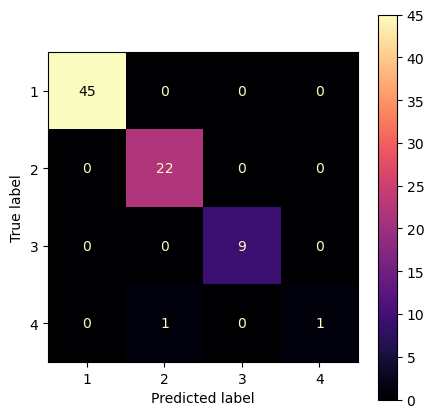

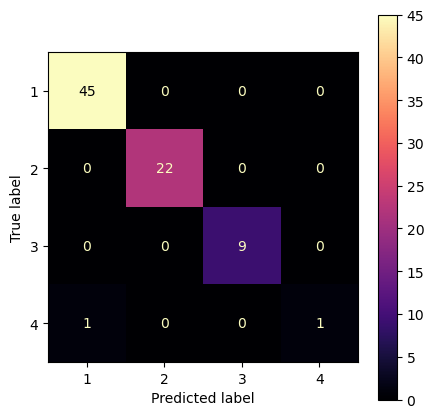

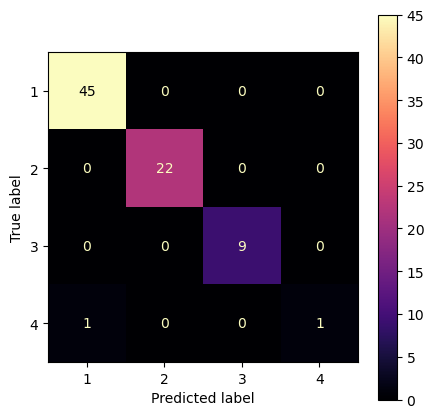

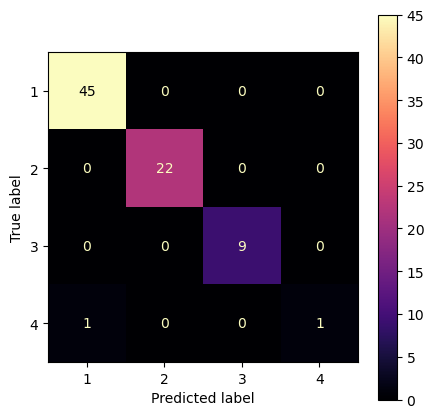

In [83]:
## TPOP

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
dff3  = df_minmax.drop('DIABETIC',axis=1)
cols  = dff3.columns
cols1 = d1.T.columns[:14]
cols1 = cols1.append(pd.Index(['RACE']))
cols2 = gini.T.columns[:14].append(pd.Index(['RACE']))
cols3 = MI.T.columns[:14].append(pd.Index(['RACE']))

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


colss = [cols,cols1,cols2,cols3]
for col in colss:
    
    X = dff3[col].drop(['RACE'],axis=1)
    y = df37['RACE']
    trainX, testX, trainy,testy = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
    
    ros = RandomOverSampler()
    
    X,y = ros.fit_resample(trainX,trainy)
    print('Training set statistics')
    for i in y.unique():
        print('For RACE='+str(i)+', n=',len(y==i))
    
    # define search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    search_model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
    
    # perform the search
    grid_result = search_model.fit(X, y)
    
    # Use the best parameters from TPOP
    
    print('Test set statistics')
    for i in testy.unique():
        print('For RACE='+str(i)+', n=',len(testy==i))

    #Create svm Object with the Best parameter from gridSearch with all features
    TPOT_model =  grid_result
    
    #Train the model
    TPOT_model.fit(X,y)

    #Predict test data set
    y_pred = TPOT_model.predict(testX)

    #Checking the performance of our model with classification report.
    from sklearn.metrics import classification_report
    print(col)
    print('Resulting classification reports:', "\n",classification_report(testy,y_pred, target_names=['White','Black','Hispanic','Others']))
    print(ConfusionMatrixDisplay.from_predictions(testy,y_pred,cmap='magma'))